In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
medical_insurance=pd.read_csv(r"D:\RESUME ML PROJECTS\Medical Insurance Cost Prediction\notebooks\insurance\medical_insurance.csv")

In [3]:
medical_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# shape of the data
medical_insurance.shape

(2772, 7)

In [5]:
# copy of the data
insurance=medical_insurance.copy()

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# info of the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [8]:
# check null values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# duplicted
insurance.duplicated().sum()

1435

In [10]:
# drop duplicated values
insurance=insurance.drop_duplicates()

In [11]:
insurance.shape

(1337, 7)

In [12]:
# datatypes
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
# visualization
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


<Axes: xlabel='count', ylabel='sex'>

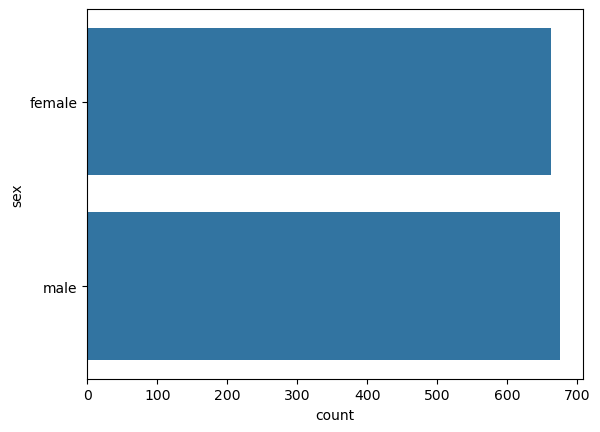

In [14]:
sns.countplot(insurance["sex"])

<Axes: xlabel='children', ylabel='Count'>

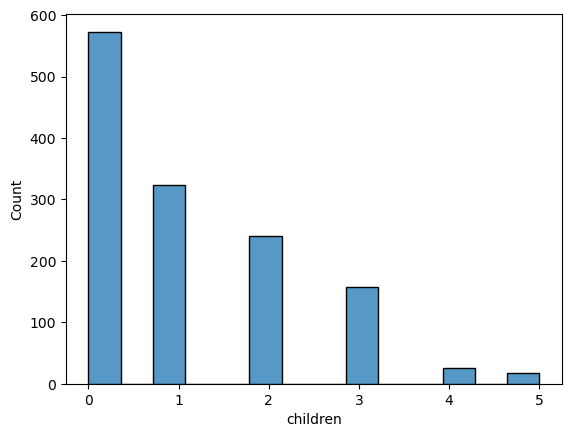

In [15]:
sns.histplot(insurance["children"])

<Axes: xlabel='count', ylabel='region'>

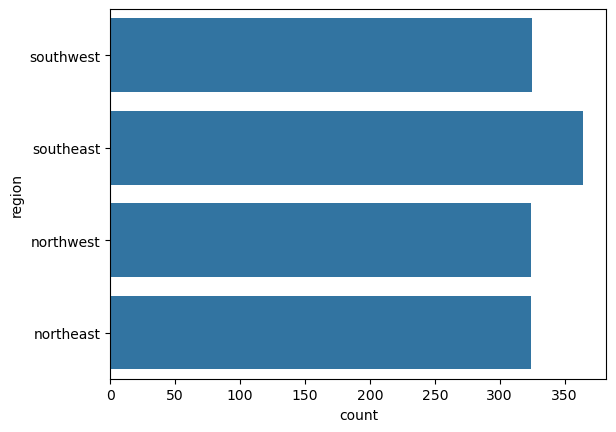

In [16]:
sns.countplot(insurance["region"])

<Axes: xlabel='count', ylabel='smoker'>

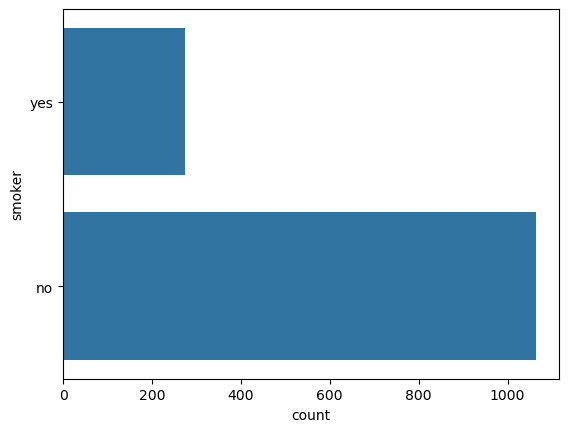

In [17]:
sns.countplot(insurance["smoker"])

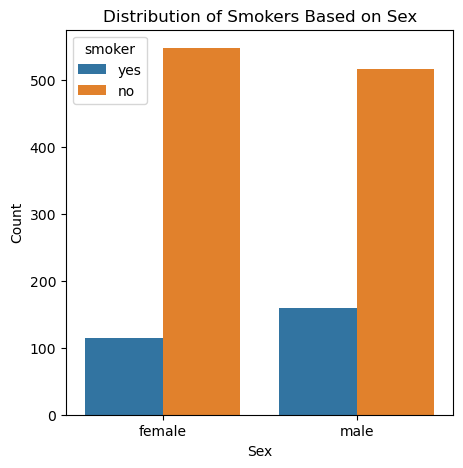

In [18]:
# Countplot for Sex vs Smoker
plt.figure(figsize=(5,5))
sns.countplot(x='sex', hue='smoker', data=insurance)
plt.title('Distribution of Smokers Based on Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

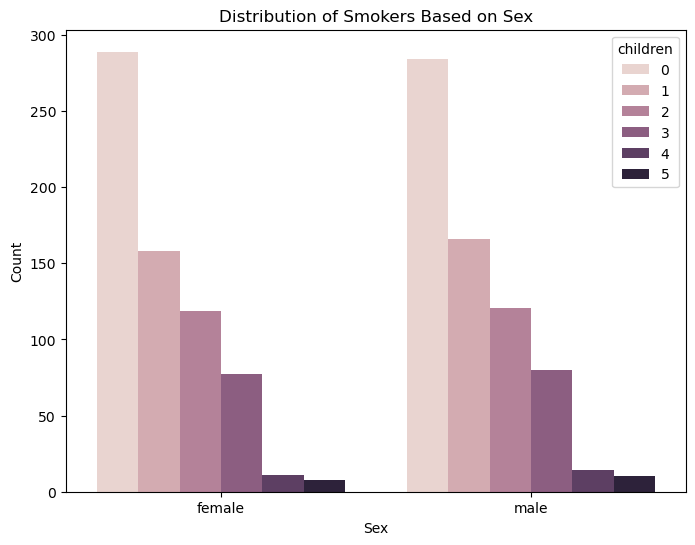

In [19]:
# Countplot for Sex vs Smoker
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='children', data=insurance)
plt.title('Distribution of Smokers Based on Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_26324\2347868661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance["bmi"])


<Axes: xlabel='bmi', ylabel='Density'>

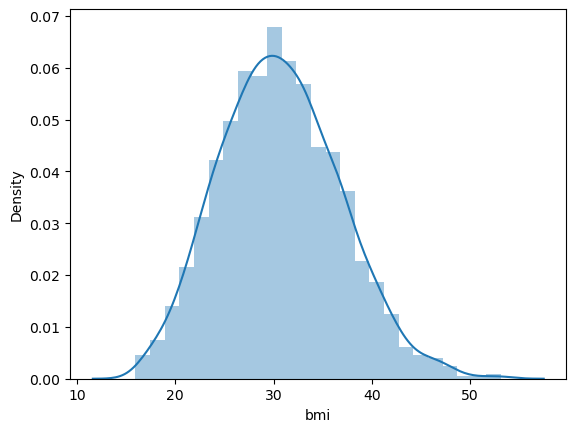

In [20]:
sns.distplot(insurance["bmi"])

<Axes: >

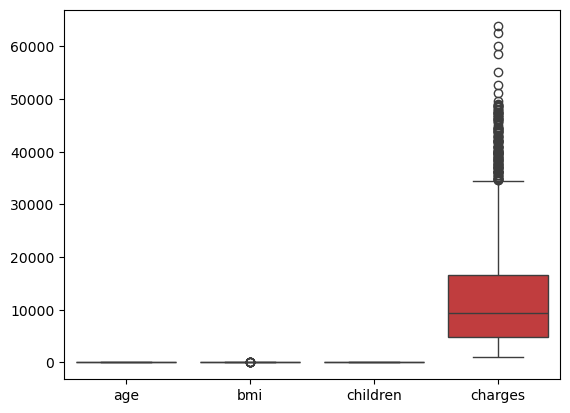

In [21]:
sns.boxplot(insurance)

What I find insights from the data:

1.bmi range should be between 18 to around 60.

2.In sex category males are high and feamles are low.

3.In sex female category smoke low some people and high some people vice versa.

4.In smoker category no smoke people are high 

In [22]:
numerical_cols=insurance.select_dtypes(exclude="object").columns
categorical_cols=insurance.select_dtypes(include="object").columns

In [23]:
numerical_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [24]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [25]:
x=insurance.drop(columns="charges")
y=insurance["charges"]

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numerical_cols=['age', 'bmi', 'children']

categorical_cols=['sex', 'smoker', 'region']

num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehotEncoder",OneHotEncoder())
    ]
)

preprocessor=ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,numerical_cols),
        ("cat_pipeline",cat_pipeline,categorical_cols)
    ]
)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
print(x.shape,x_train.shape,x_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [29]:
print(y.shape,y_train.shape,y_test.shape)

(1337,) (1069,) (268,)


In [30]:
x_train_scaled=preprocessor.fit_transform(x_train)
x_test_scaled=preprocessor.transform(x_test)

In [31]:
x_train_scaled

array([[-1.1576804 , -0.99692768, -0.90790804, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30061876, -0.79276204,  0.7669042 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91492586,  1.15466402,  0.7669042 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.37208794, -1.4118716 , -0.07050192, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08564268, -0.41997378,  1.60431032, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30005022,  0.87941237,  0.7669042 , ...,  0.        ,
         1.        ,  0.        ]])

In [32]:
corr_scled=pd.DataFrame(x_train_scaled)

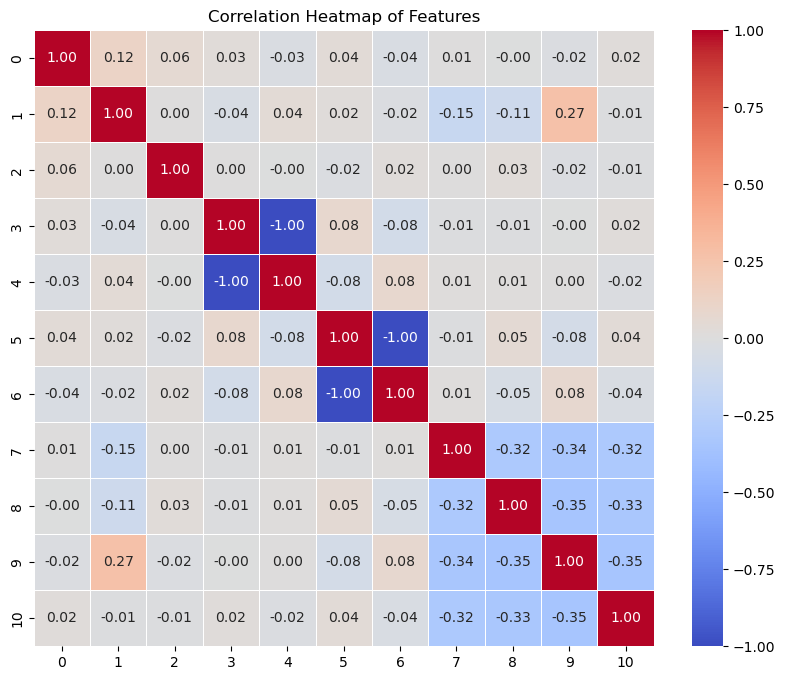

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming corr_scled is your DataFrame with scaled data
# Create the correlation matrix
corr_matrix = corr_scled.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

# Display the plot
plt.title('Correlation Heatmap of Features')
plt.show()


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [35]:
models={
    "LinearRegression":LinearRegression(),
    "SVR":SVR(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    
}

In [36]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def evluate(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    score = r2_score(true, predicted)
    return mse, mae, score

In [37]:

# Lists to store results
model_list = []
score = []

# Iterate through the models
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)

    # Predictions for training and testing sets
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    # Evaluate model performance
    model_train_mse, model_train_mae, model_train_score = evluate(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_score = evluate(y_test, y_test_pred)

    # Print the model name and results
    print(f"Model: {model_name}")
    model_list.append(model_name)

    print("Performances for training dataset")
    print(f"model_train_mse: {model_train_mse}")
    print(f"model_train_mae: {model_train_mae}")
    print(f"model_train_r2_score: {model_train_score}")
    print("-------------------------------------------------------------")

    print("Performances for testing dataset")
    print(f"model_test_mse: {model_test_mse}")
    print(f"model_test_mae: {model_test_mae}")
    print(f"model_test_r2_score: {model_test_score}")
    score.append(model_test_score)

    print("-----------------------------------------------------------------")

# Print the final results (optional)
print("Model performance comparison on test set:")
for i, model_name in enumerate(model_list):
    print(f"{model_name}: {score[i]}")








Model: LinearRegression
Performances for training dataset
model_train_mse: 36979860.90472867
model_train_mae: 4181.901537775148
model_train_r2_score: 0.7299057809339075
-------------------------------------------------------------
Performances for testing dataset
model_test_mse: 35478020.67523561
model_test_mae: 4177.045561036325
model_test_r2_score: 0.8069287081198011
-----------------------------------------------------------------
Model: SVR
Performances for training dataset
model_train_mse: 150503154.60157594
model_train_mae: 8082.599879866369
model_train_r2_score: -0.0992478342150298
-------------------------------------------------------------
Performances for testing dataset
model_test_mse: 208090336.75511038
model_test_mae: 9260.280186263239
model_test_r2_score: -0.13242704582836695
-----------------------------------------------------------------
Model: RandomForestRegressor
Performances for training dataset
model_train_mse: 3425671.5484394254
model_train_mae: 1047.39761290813

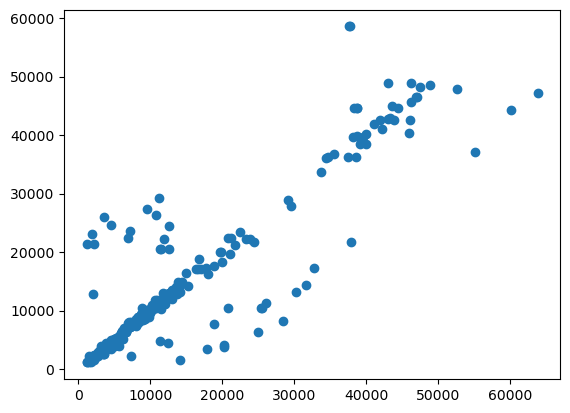

In [38]:
plt.scatter(y_test,y_test_pred)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define the model
gb_model = GradientBoostingRegressor()

# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 201, 50),        # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],       # Step size shrinking to avoid overfitting
    'max_depth': [3, 5, 7, 9],                      # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],                 # Minimum number of samples required to split an internal node
    'subsample': [0.8, 0.9, 1.0],                    # Fraction of samples used for fitting each base model
    'max_features': ['sqrt', 'log2', None]           # Number of features to consider when looking for the best split
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='r2', n_jobs=-1, verbose=1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(x_train_scaled, y_train)

# Print the best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.9, 'n_estimators': 50, 'min_samples_split': 10, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.05}
Best score: 0.8395499390906712


In [40]:
y_test_random=random_search.predict(x_test_scaled)
random_score_for_test=r2_score(y_test,y_test_random)
print("r2_score for testing data is",random_score_for_test)

r2_score for testing data is 0.8918475023078806


In [41]:
y_train_random=random_search.predict(x_train_scaled)
random_score_for_train=r2_score(y_train,y_train_random)
print("r2_score for training data is",random_score_for_train)

r2_score for training data is 0.8556680869988442


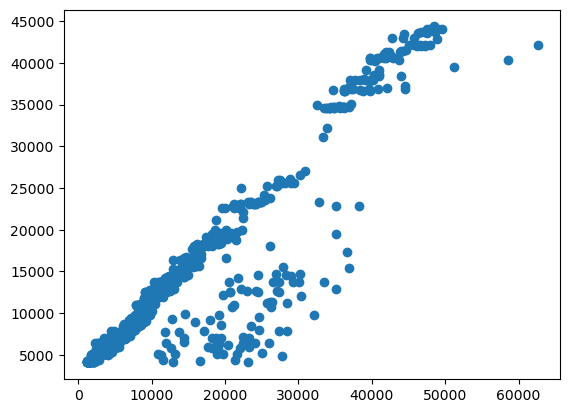

In [42]:
# for training data
plt.scatter(y_train,y_train_random)

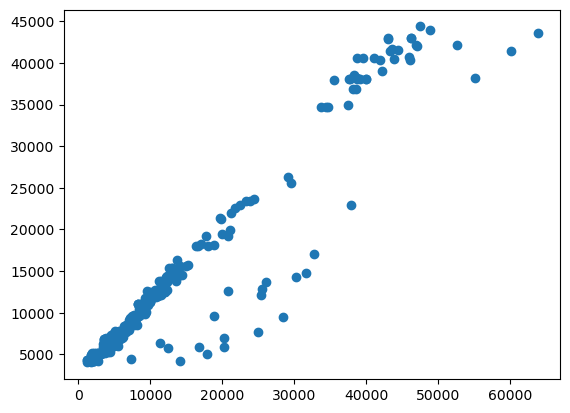

In [43]:
# for tetsing data
plt.scatter(y_test,y_test_random)

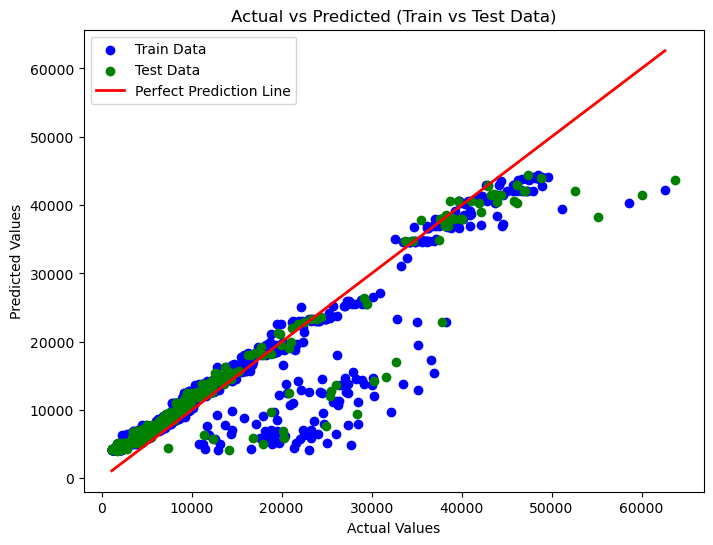

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming model is already trained and we have predictions:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

# Plotting predicted vs. actual values for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train,y_train_random, color='blue', label='Train Data')
plt.scatter(y_test,y_test_random, color='green', label='Test Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label="Perfect Prediction Line")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Train vs Test Data)')
plt.legend()
plt.show()


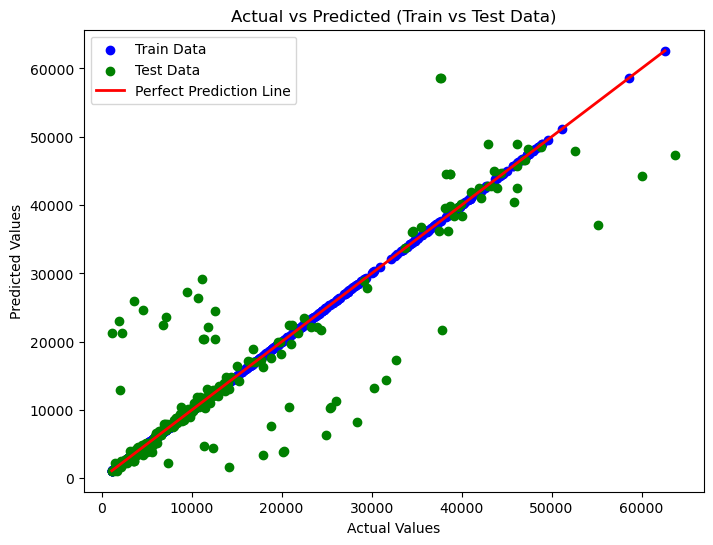

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming model is already trained and we have predictions:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

# Plotting predicted vs. actual values for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train,y_train_pred, color='blue', label='Train Data')
plt.scatter(y_test,y_test_pred, color='green', label='Test Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label="Perfect Prediction Line")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Train vs Test Data)')
plt.legend()
plt.show()

In [46]:
insurance.to_csv("cleaned.csv")